In [7]:
import numpy as np
import pandas as pd
import time




In [8]:
import json
# first method
with open('brute_force_data.json', 'r', encoding='utf-8-sig') as f:
  data = json.load(f)
len(data)


14795

In [9]:
df = pd.DataFrame(data) 


In [10]:
r = pd.DataFrame({
      col:np.repeat(df[col].values, df['passwords'].str.len())
      for col in df.columns.drop('passwords')}
    ).assign(**{'passwords':np.concatenate(df['passwords'].values)})[df.columns]
r['length'] = r['passwords'].astype(str).map(len)
r= r[r['length'] <= 20]
r.reset_index(inplace = True)
r.drop(['length','index'], axis=1,  inplace=True)


In [11]:
r

,username,timestamp,passwords,foreign_ip
0,albert,Mon Nov 5 08:31:18 2018,     ,109.87.224.151
1,albert,Mon Nov 5 08:31:18 2018,albert,109.87.224.151
2,albert,Mon Nov 5 08:31:18 2018,123456,109.87.224.151
3,root,Mon Nov 5 22:16:56 2018,digi,122.226.181.166
4,root,Mon Nov 5 22:16:56 2018,daddy913,122.226.181.166
...,...,...,...,...
53613,root,Wed Nov 7 02:23:06 2018,root123,125.65.42.183
53614,root,Wed Nov 7 02:23:06 2018,ubuntu,125.65.42.183
53615,root,Wed Nov 7 14:01:35 2018,longshot,61.184.247.10
53616,root,Wed Nov 7 14:01:35 2018,joshua123,61.184.247.10


In [12]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53618 entries, 0 to 53617
Data columns (total 4 columns):
username      53618 non-null object
timestamp     53618 non-null object
passwords     53618 non-null object
foreign_ip    53618 non-null object
dtypes: object(4)
memory usage: 1.6+ MB


In [13]:
#calculate the number of all possible input for each slot, 94
num=10
letter=26*2
special=13+2+3*2+5*2+1
tol=num+letter+special
tol

94

In [14]:
# scanning function which returns 1 if the j th input of the password a is k, otherwise returns 0
colStr="0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ~!@#$%^&*()_+-={}|:\"<>?[]\\;',./ "
def scan(a,j,k):
    if a[j] == k:
        return 1
    else:
        return 0


In [15]:
m53618 = np.zeros(shape=(53618,tol*20))
a = time.time()
for i in range(53618):
    for j in range(len(r["passwords"][i])):
       for k in range(len(colStr)):
            m53618[i,j*tol+k]=scan(r["passwords"][i],j,colStr[k])
b = time.time()
print(b-a)
        

324.4379222393036


In [16]:
#setting the column name of the dataframe
#the list of column names start with 00, 01, 03...indicating if the 0 index of the passward is 0 or 1 or 3 etc.
def dfColumn(tol,colStr):
    aDic={}
    for j in range (20): 
        for i in range (tol):           
            aDic[str(j)+colStr[i]]=m53618[:,j*tol+i]
    return aDic


In [17]:
dataset53618 = pd.DataFrame(dfColumn(94,colStr))
dataset53618

,00,01,02,03,04,05,06,07,08,09,...,19?,19[,19],19\,19;,19',"19,",19.,19/,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standard53618 = StandardScaler().fit_transform(dataset53618)

pca = PCA(n_components=2)
principalComponents53618 = pca.fit_transform(standard53618)
principalDf53618 = pd.DataFrame(data = principalComponents53618
             , columns = ['principal component 1', 'principal component 2'])

In [19]:
principalDf53618
principalDf53618_ = principalDf53618[
    (principalDf53618['principal component 1']<5) & (principalDf53618['principal component 2']<5)
& (principalDf53618['principal component 1']>-2) & (principalDf53618['principal component 2']>-2)]

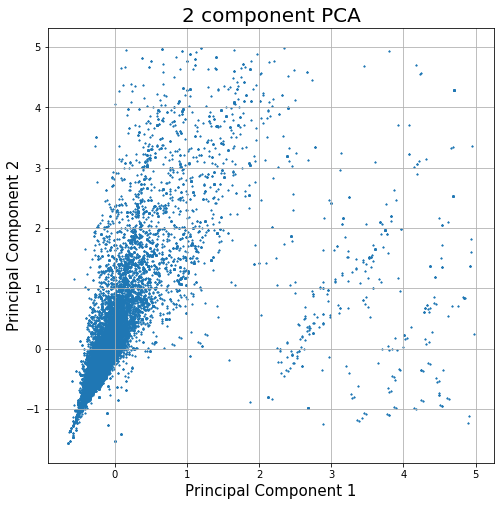

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf53618_['principal component 1']
               , principalDf53618_['principal component 2']
               , s = 2, marker = '*')

ax.grid()

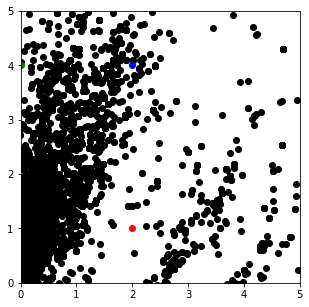

In [21]:
##initialization the centroids
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({
    'x': principalDf53618_['principal component 1'],
    'y': principalDf53618_['principal component 2']
})

np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 5), np.random.randint(0, 5)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

In [22]:
##asssignment stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
        centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [23]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)
    
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 5)
plt.ylim(0, 5)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

KeyError: 'closest'

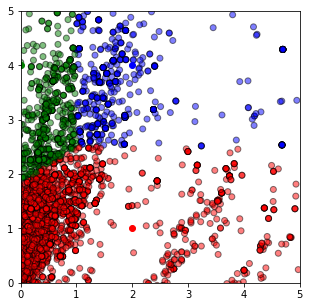

In [24]:
## Repeat Assigment Stage

df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()


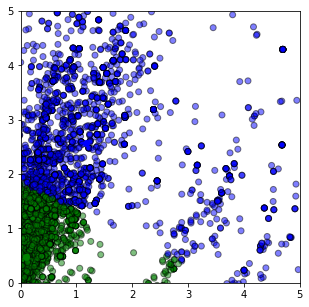

In [26]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

ValueError: could not convert string to float: 'r'

In [28]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

NameError: name 'labels' is not defined

<Figure size 360x360 with 0 Axes>